In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

In [7]:
#建立模型

#點光源
def point_source(size):
    img = np.zeros((size, size))
    img[size //2, size //2] = 1.0
    return img

#Gaussian分布
def gaussian(size, sigma_x, sigma_y=None):
    if sigma_y is None:
        sigma_y = sigma_x
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-(X**2 / (2*sigma_x**2)+ Y**2 / (2*sigma_y**2)))
    return Z

#disk
def disk(size, radius):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    Z = (R <= radius).astype(float)
    return Z


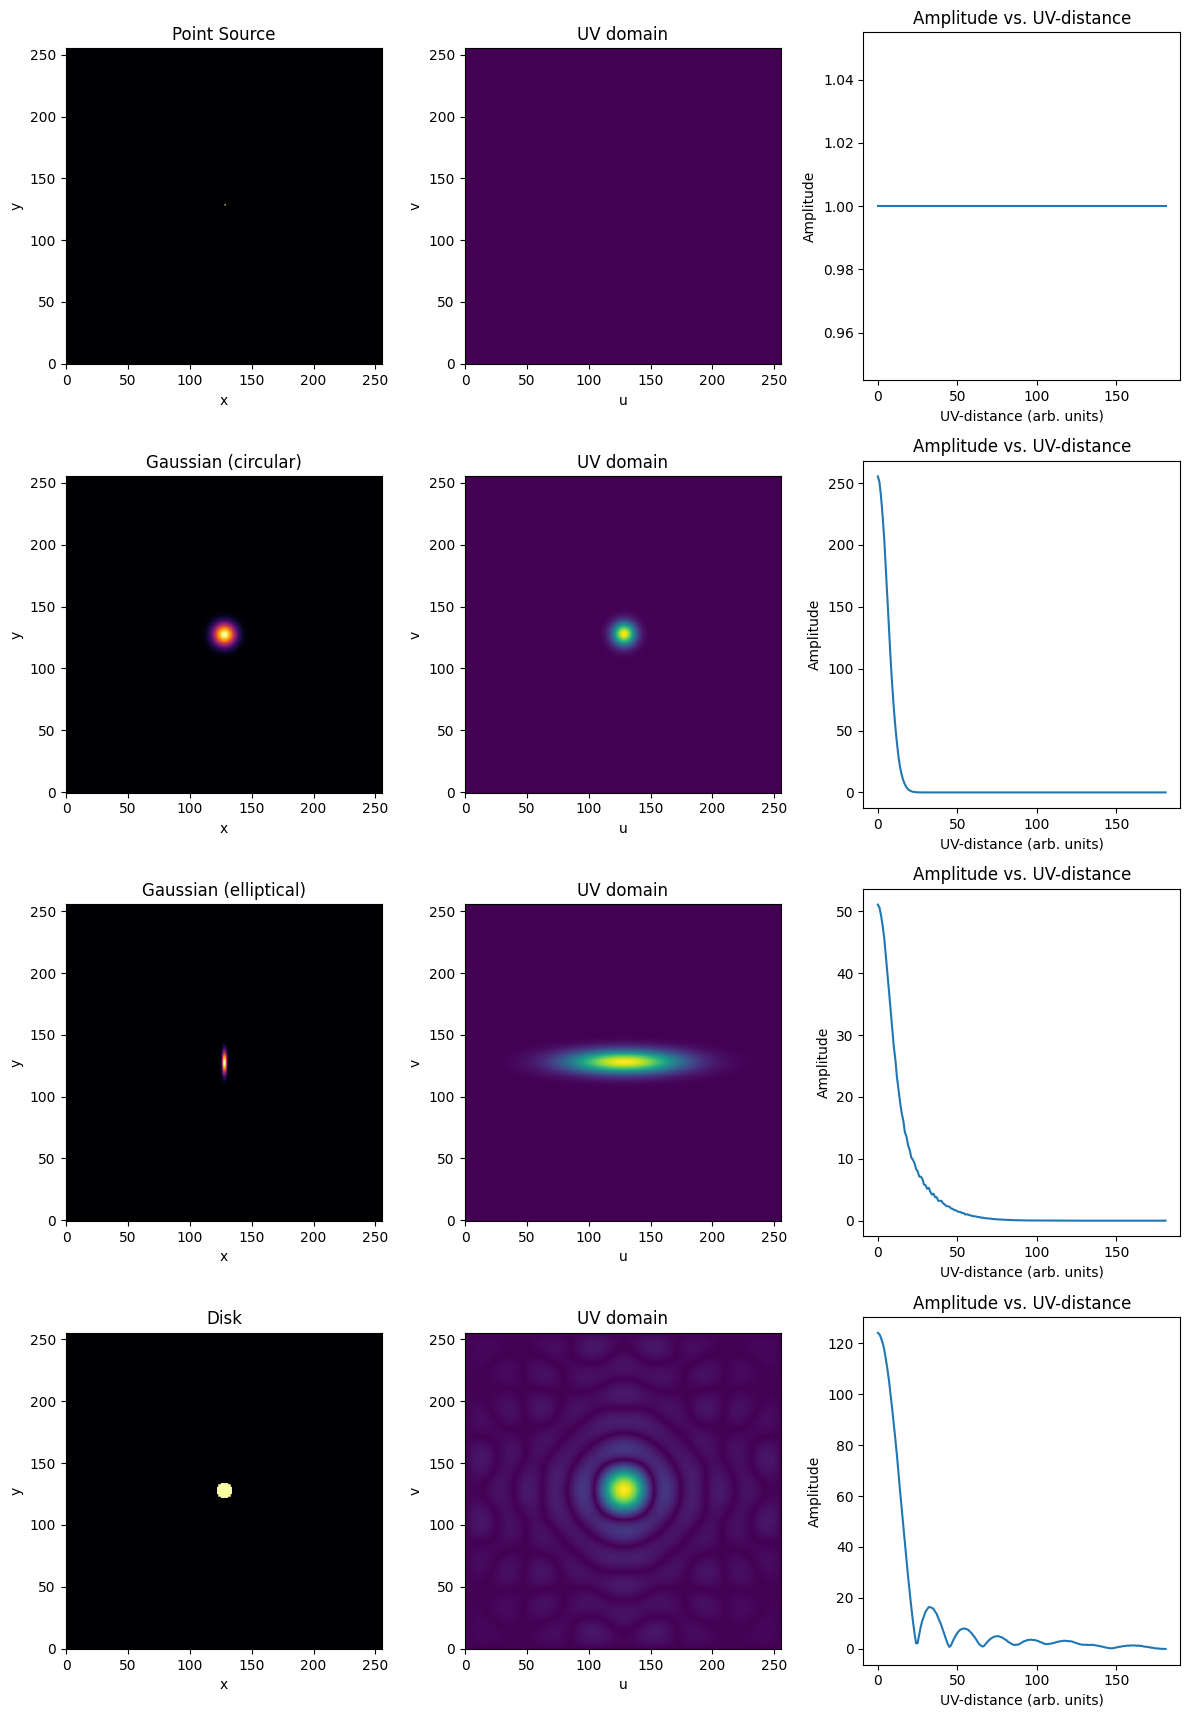

In [ ]:
#畫圖

#四個東西
size = 256
#model = [("Point Source", point_source(size)),
#         ("Gaussian (circular)", gaussian(size, 0.05)),
#         ("Gaussian (elliptical)", gaussian(size, 0.01, 0.05)),
#         ("Disk", disk(size, 0.05))]

fig, axs = plt.subplots(1,3 ,figsize=(12, 18))
img = point_source(size)

axs[0, 0].imshow(img, origin="lower", cmap="inferno")
axs[0, 0].set_title("Point Source")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("y")

#FT

vis_img = fftshift(fft2(img))
amplitude = np.abs(vis_img)

axs[0, 1].imshow(vis_img, origin="lower", camp="viridis")

'''for i, (title, img) in enumerate(model):
    #intensity
    axs[i, 0].imshow(img, origin='lower', cmap='inferno')
    axs[i, 0].set_title(title)
    axs[i, 0].set_xlabel("x")
    axs[i, 0].set_ylabel("y")

    #FT
    vis_img = fftshift(fft2(img))
    amplitude = np.abs(vis_img)

    axs[i, 1].imshow(amplitude, origin='lower', cmap='viridis')
    axs[i, 1].set_title("UV domain")
    axs[i, 1].set_xlabel("u")
    axs[i, 1].set_ylabel("v")

    #uv-distance profile（圓對稱平均）
    u = np.arange(-size // 2, size // 2)
    U, V = np.meshgrid(u, u)
    uv_dist = np.sqrt(U**2 + V**2).astype(int)

    max_dist = uv_dist.max()
    amp_profile = np.zeros(max_dist + 1)
    counts = np.zeros(max_dist + 1)

    for r in range(max_dist + 1):
        mask = (uv_dist == r)
        amp_profile[r] = amplitude[mask].sum()
        counts[r] = mask.sum()
    amp_profile /= counts

    axs[i, 2].plot(amp_profile)
    axs[i, 2].set_title('Amplitude vs. UV-distance')
    axs[i, 2].set_xlabel('UV-distance (arb. units)')
    axs[i, 2].set_ylabel('Amplitude')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()'''



